# Titanic Project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


input variables = class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

output variables= survival - Survival (0 = No; 1 = Yes)

# Import Libraries

In [576]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [577]:
#loading data
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we can see that output variable "Survived" is of binary type. It is a logistic regression or classification problem

In [578]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


we can see NaN values 

In [579]:
df.shape

(891, 12)

There are 891 rows and 12 columns

In [580]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name,sex,cabin,embarked,ticket os of object type for which required columns can be changed using ordinal encoder. All other datas are of int or float type

In [581]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [582]:
df['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
CA 2144     6
           ..
364850      1
345783      1
2223        1
330979      1
2926        1
Name: Ticket, Length: 681, dtype: int64

In [583]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
C22 C26        3
              ..
B86            1
B50            1
C103           1
A26            1
B82 B84        1
Name: Cabin, Length: 147, dtype: int64

In [584]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Missing values

In [585]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

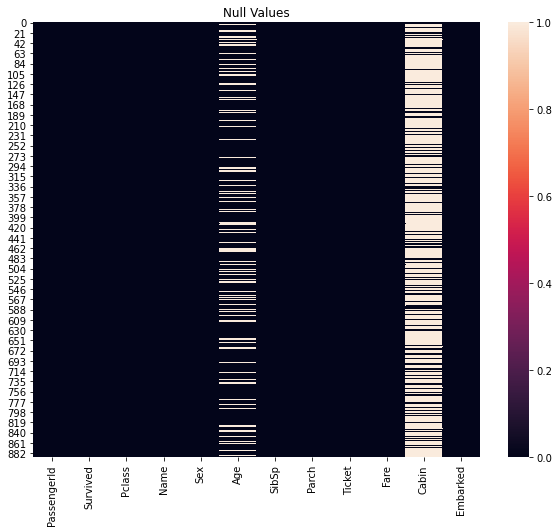

In [586]:
#heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

we can see many null values in age,cabin and embarked

In [587]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [588]:
df['Age'].isnull().sum()

0

In [589]:
df['Cabin'].fillna('G6',inplace=True)

In [590]:
df['Cabin'].head(10)   #MODE IS G6

0      G6
1     C85
2      G6
3    C123
4      G6
5      G6
6     E46
7      G6
8      G6
9      G6
Name: Cabin, dtype: object

In [591]:
df['Cabin'].isnull().sum()

0

In [592]:
df['Embarked'].mode()

0    S
dtype: object

In [593]:
df['Embarked'].fillna('S',inplace=True)

In [594]:
df['Embarked'].isnull().sum()

0

Null values are removed/replaced successfully

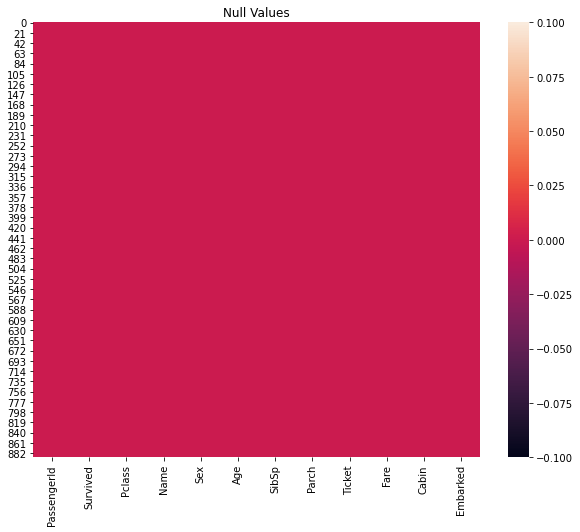

In [595]:
#heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are no null  values in the dataset now

# Encoding data

In [596]:
from sklearn.preprocessing import OrdinalEncoder

In [597]:
OE=OrdinalEncoder()
df['Sex']=OE.fit_transform(df['Sex'].values.reshape(-1,1))

In [598]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,G6,S


In [599]:
df['Embarked']=OE.fit_transform(df['Embarked'].values.reshape(-1,1))

In [600]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.000000,1,0,A/5 21171,7.2500,G6,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.000000,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.000000,0,0,STON/O2. 3101282,7.9250,G6,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.000000,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.000000,0,0,373450,8.0500,G6,2.0
5,6,0,3,"Moran, Mr. James",1.0,29.699118,0,0,330877,8.4583,G6,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",1.0,54.000000,0,0,17463,51.8625,E46,2.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1.0,2.000000,3,1,349909,21.0750,G6,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.0,27.000000,0,2,347742,11.1333,G6,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.0,14.000000,1,0,237736,30.0708,G6,0.0


SEX male=1,female=0; Embarked C=0,Q=1,S=2

Sex and Embarked column is encoded as it was categorical data

# Statistics summary

In [601]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


The count is same in all datas. There are possible outliers in fare column.SibSp siblings and Parents children Parch columns are count  data.we can further analyze for skewness and outliers 

In [602]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

It looks like 8 and 5 no of siblings doesn't add much value to the output as it has only 12 rows in total,This we can do later to remove skewness if needed.

In [603]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Similarily the dataset have high importance and data on 0,1,2 parents or children.

In [604]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

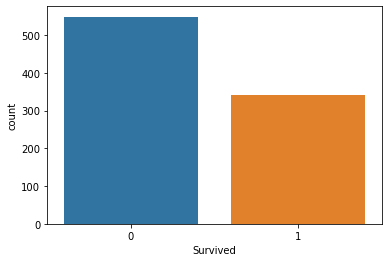

In [605]:
sns.countplot(x=df.Survived)

It is balanced data

# Correlation Check

In [606]:
dfcor=df.corr()

In [607]:
dfcor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


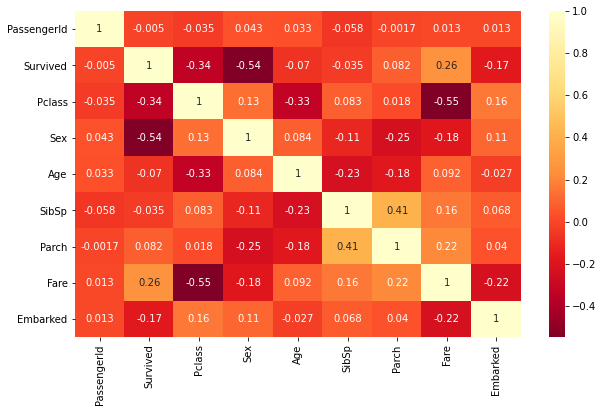

In [608]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

The passedngerId is zero correlated to survived. After that SibSp ,Parch and Age doesn't make much impact to the survived data.
We can analyze further and conclude whether to remove this columns or not

we can drop name,Ticket and Cabin column as they are just object type data and model doesn't need them

In [609]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [610]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
4,5,0,3,1.0,35.0,0,0,8.0500,2.0


# Data Visualization

# check distribution of  data : Skewness

In [611]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [612]:
columns=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']

In [613]:
df.shape

(891, 9)

In [614]:
collist=df.columns.values
ncol=9
nrows=10

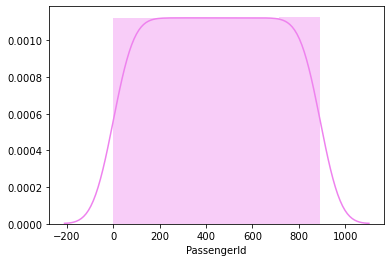

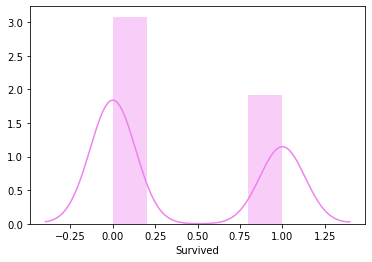

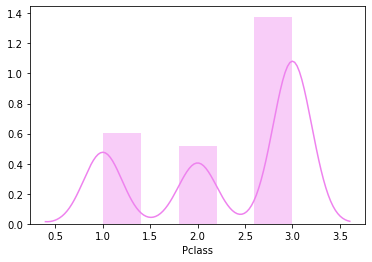

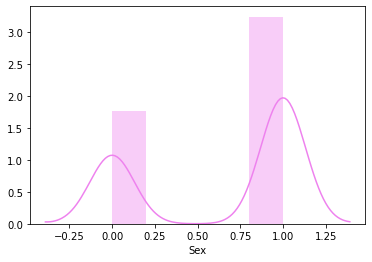

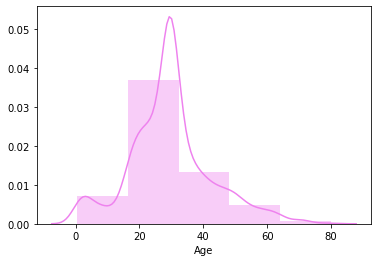

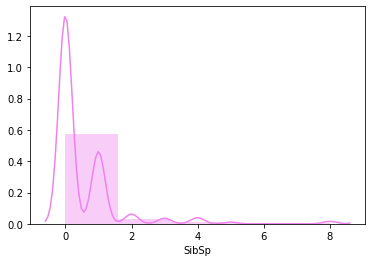

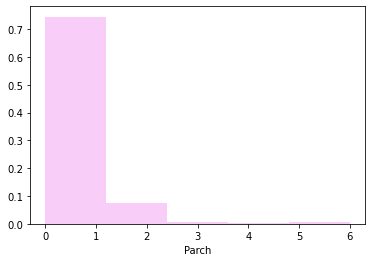

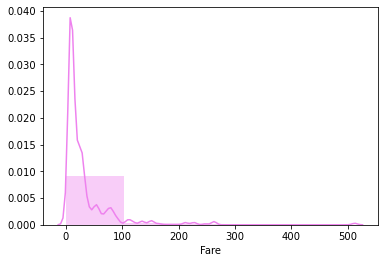

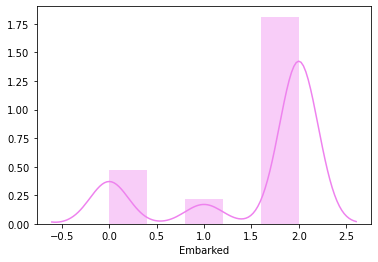

In [615]:
def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='violet',bins=5)
    
for i in range(0,9):
    dtp(i)

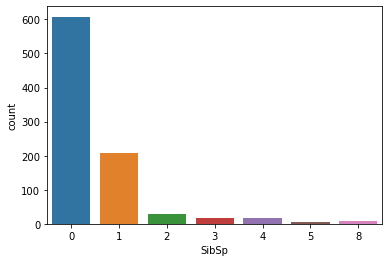

In [616]:
sns.countplot(x=df.SibSp)

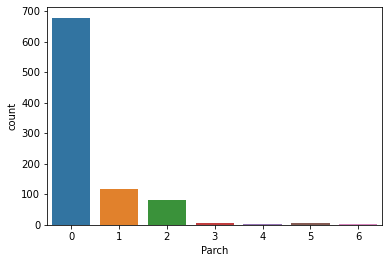

In [617]:
sns.countplot(x=df.Parch)

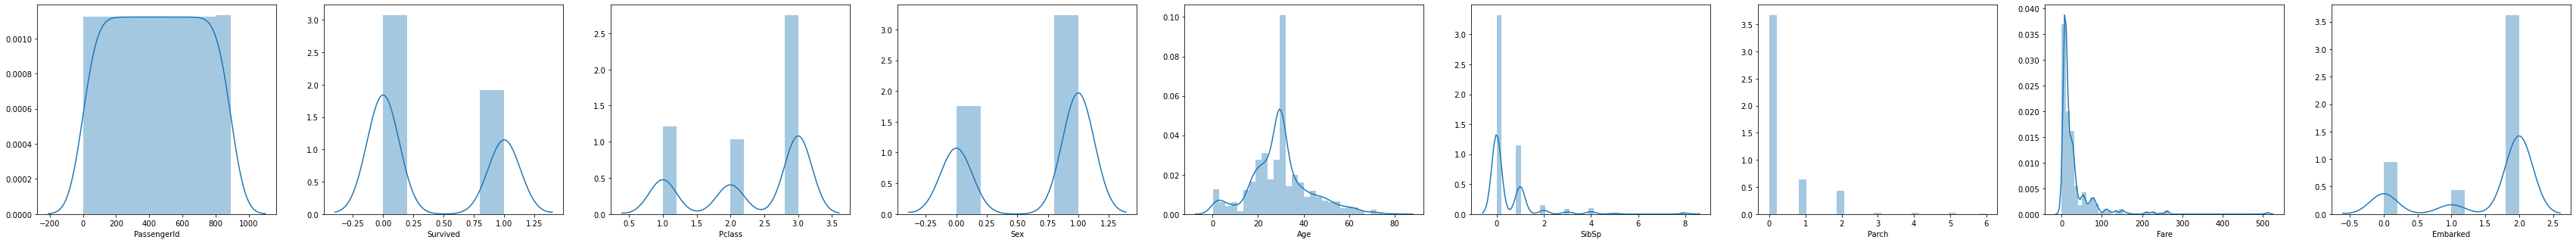

In [618]:
plt.figure(figsize=(60,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

Most of the data are normally distributed apart from age, fare. some other features are categorical data

# Detecting Outliers


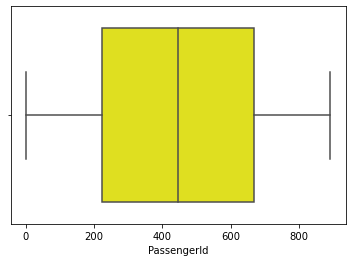

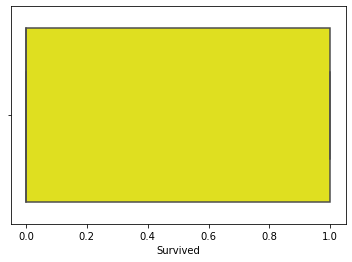

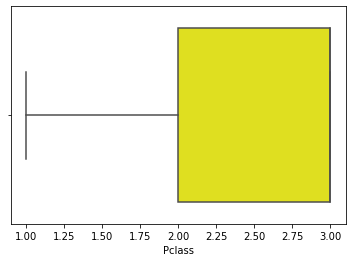

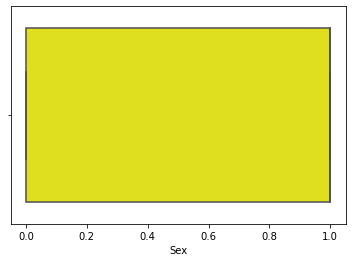

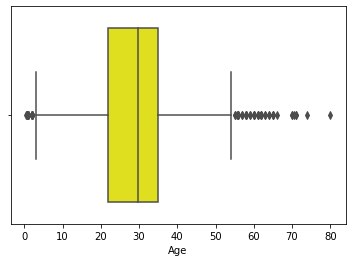

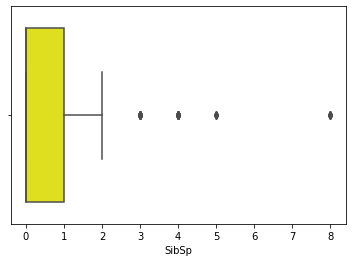

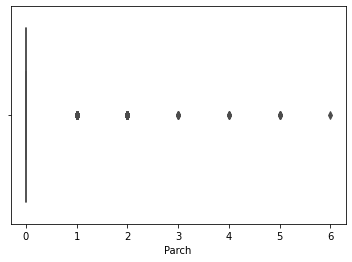

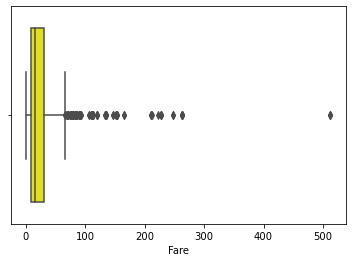

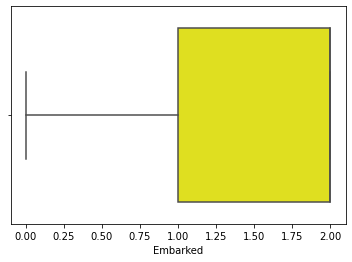

In [619]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],color='yellow')
    
for i in range(0,9):
    bxplt(i)


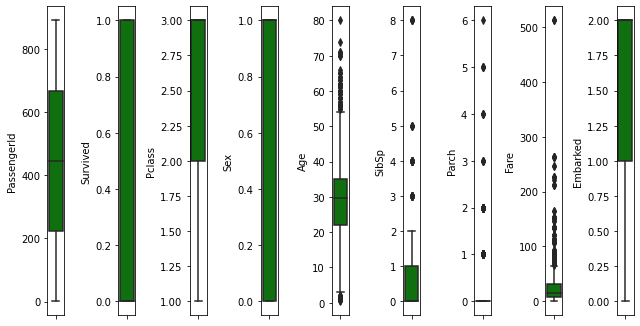

In [620]:
# to see outliers in a single visualization

plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

There are outliers present in Fare,Age which should be removed. All other datas are categorical data

# Checking distribution relationship

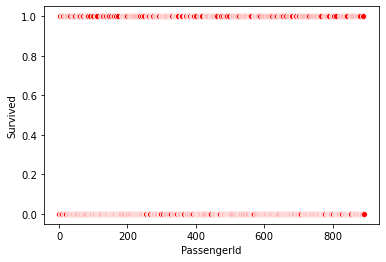

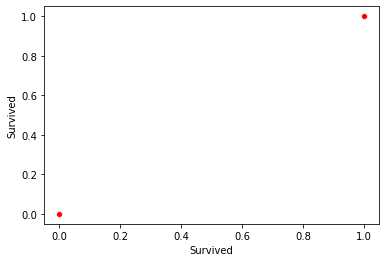

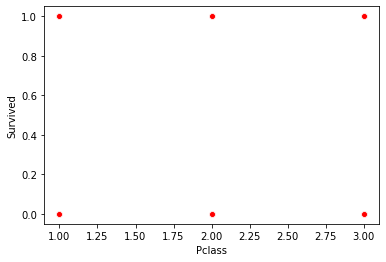

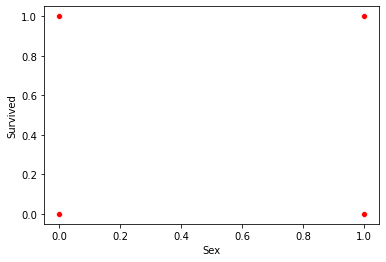

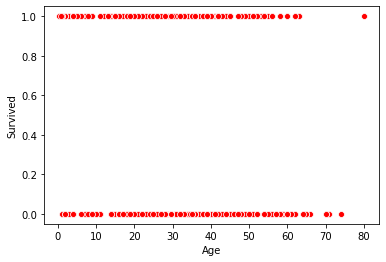

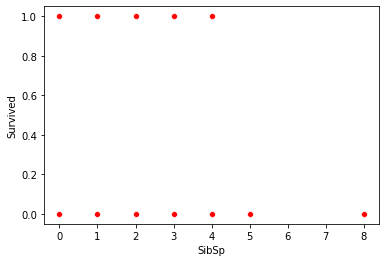

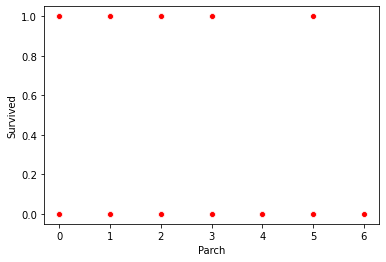

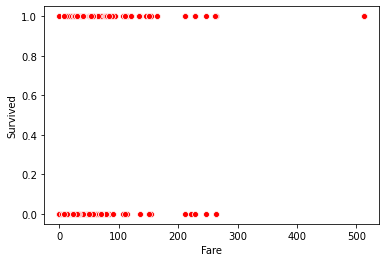

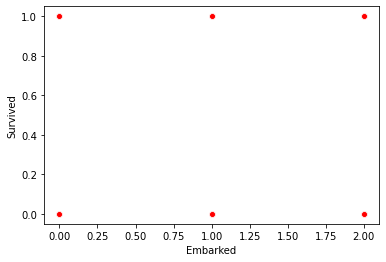

In [621]:
#relationship for each feature name with the output

def dtp(a):
    plt.figure()
    sns.scatterplot(x=df[columns[a]],y=df['Survived'],color='red')
    
for i in range(0,9):
    dtp(i)

In [622]:
(df['Age']==0).sum()

0

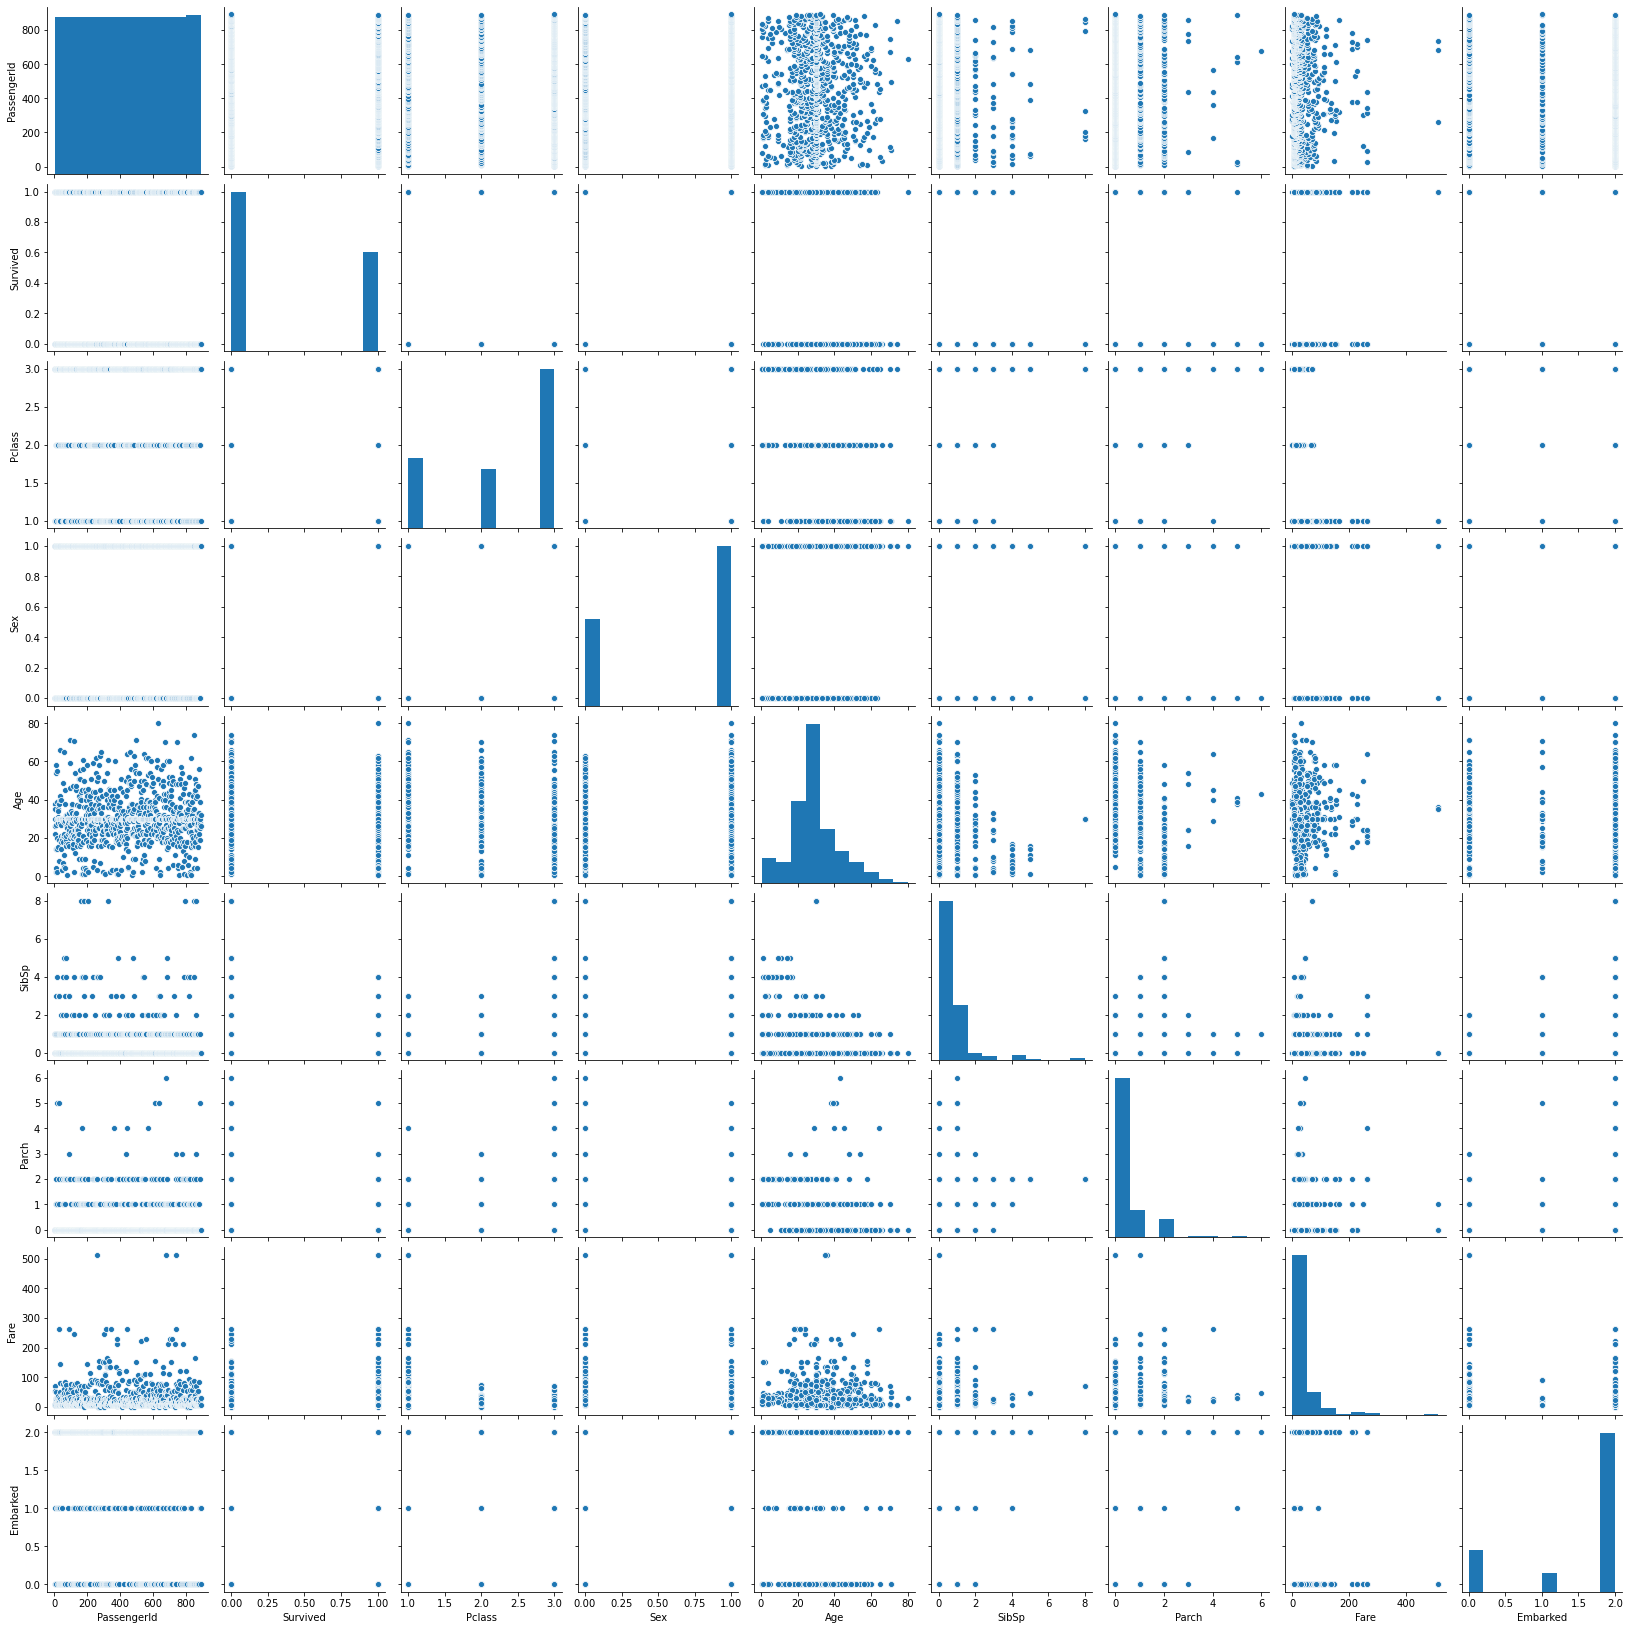

In [623]:
sns.pairplot(df)

As most of the dats is of categorical type. we need to focus only on Age and fare

In [624]:
#data cleaning and data analysis done. Not dropping any column to minimize data loss

# Removing outliers

In [625]:
#zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [626]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
       6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [627]:
z[7][5]

2.2474704895351842

In [628]:
z[25][5]

0.4327933656785018

In [629]:
z[827][4]

2.208521965349999

In [630]:
df_new=df[(z<3).all(axis=1)]

In [631]:
df.shape

(891, 9)

In [632]:
df_new.shape

(820, 9)

In [633]:
outliers_removed= 891-820

In [634]:
print("Total outlier removed is ",outliers_removed)

Total outlier removed is  71


In [635]:
data=df_new

In [636]:
data=pd.DataFrame(data)

Outliers removed successfully

In [637]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
4,5,0,3,1.0,35.0,0,0,8.0500,2.0


# Skewness Removal

In [638]:
data.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
dtype: float64

There are skewness seen.we can remove skewness from fare as all other columns are categorical data

In [639]:
from sklearn.preprocessing import PowerTransformer
data['Fare']=PowerTransformer().fit_transform(data['Fare'].values.reshape(-1,1))


In [640]:
data.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare          -0.018602
Embarked      -1.277386
dtype: float64

For categorical columns we need not remove skewness. skewnesss corrected for Fare feature name

In [641]:
data.drop("PassengerId",axis=1,inplace=True)  #as it doesn't add any value to output

# Model Building

In [642]:
#initialising x and y
x=data.drop('Survived',axis=1)

In [643]:
y=data['Survived']

In [644]:
#scaling data as it contains both int and float
SC=StandardScaler()
X=SC.fit_transform(x)
x=pd.DataFrame(X,columns=x.columns)

In [645]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [646]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.833995,0.722036,-0.641702,1.051956,-0.451141,-0.834702,0.583162
1,-1.586804,-1.384973,0.675821,1.051956,-0.451141,1.553645,-1.953669
2,0.833995,-1.384973,-0.312321,-0.563407,-0.451141,-0.743314,0.583162
3,-1.586804,-1.384973,0.428785,1.051956,-0.451141,1.250341,0.583162
4,0.833995,0.722036,0.428785,-0.563407,-0.451141,-0.727191,0.583162


In [647]:
x.shape

(820, 7)

In [648]:
y.shape

(820,)

In [649]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [650]:
#finding best random_state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.8339483394833949  on random_state  63


In [658]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=63)

In [659]:
x_train.shape

(549, 7)

In [660]:
x_test.shape

(271, 7)

In [661]:
from sklearn.ensemble import VotingClassifier

In [662]:
# different algorithm going to use

lg=LogisticRegression(multi_class='multinomial')
gnb=GaussianNB()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
vc=(VotingClassifier(estimators=[('lg', lg), ('rf', rf), ('gnb', gnb),('ad',ad),('dtc',dtc),('sv',sv)], voting='hard'))

In [663]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    
    print("accuracy score is :",accuracy_score(y_test,pred))
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [664]:
#calling function to run model

eval(lg)

LogisticRegression(multi_class='multinomial')
accuracy score is : 0.8302583025830258


Confusion Matrix : 
 [[142  24]
 [ 22  83]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.78      0.79      0.78       105

    accuracy                           0.83       271
   macro avg       0.82      0.82      0.82       271
weighted avg       0.83      0.83      0.83       271



In [665]:
eval(gnb)

GaussianNB()
accuracy score is : 0.7859778597785978


Confusion Matrix : 
 [[137  29]
 [ 29  76]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       166
           1       0.72      0.72      0.72       105

    accuracy                           0.79       271
   macro avg       0.77      0.77      0.77       271
weighted avg       0.79      0.79      0.79       271



In [666]:
eval(sv)

SVC()
accuracy score is : 0.8523985239852399


Confusion Matrix : 
 [[152  14]
 [ 26  79]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       166
           1       0.85      0.75      0.80       105

    accuracy                           0.85       271
   macro avg       0.85      0.83      0.84       271
weighted avg       0.85      0.85      0.85       271



In [667]:
eval(dtc)

DecisionTreeClassifier()
accuracy score is : 0.7638376383763837


Confusion Matrix : 
 [[134  32]
 [ 32  73]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       166
           1       0.70      0.70      0.70       105

    accuracy                           0.76       271
   macro avg       0.75      0.75      0.75       271
weighted avg       0.76      0.76      0.76       271



In [668]:
eval(rf)

RandomForestClassifier()
accuracy score is : 0.8154981549815498


Confusion Matrix : 
 [[143  23]
 [ 27  78]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       166
           1       0.77      0.74      0.76       105

    accuracy                           0.82       271
   macro avg       0.81      0.80      0.80       271
weighted avg       0.81      0.82      0.81       271



In [669]:
eval(VotingClassifier(estimators=[('lg', lg), ('rf', rf), ('gnb', gnb),('ad',ad),('dtc',dtc),('sv',sv)], voting='hard'))

VotingClassifier(estimators=[('lg',
                              LogisticRegression(multi_class='multinomial')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB()),
                             ('ad', AdaBoostClassifier(n_estimators=100)),
                             ('dtc', DecisionTreeClassifier()), ('sv', SVC())])
accuracy score is : 0.8413284132841329


Confusion Matrix : 
 [[150  16]
 [ 27  78]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       166
           1       0.83      0.74      0.78       105

    accuracy                           0.84       271
   macro avg       0.84      0.82      0.83       271
weighted avg       0.84      0.84      0.84       271



From all the algorithm, SVC classifier gives high accuracy of 85.23%. Let us cross check with cross validation score

# Cross_Validation

In [670]:
model=[lg,gnb,sv,rf,dtc,ad,vc]

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print(m,"Cross val score is ",score)
    print("mean is ",score.mean())

LogisticRegression(multi_class='multinomial') Cross val score is  [0.79878049 0.7804878  0.76219512 0.79268293 0.79268293]
mean is  0.7853658536585367
GaussianNB() Cross val score is  [0.66463415 0.78658537 0.77439024 0.79878049 0.77439024]
mean is  0.7597560975609756
SVC() Cross val score is  [0.83536585 0.79878049 0.79878049 0.81097561 0.84146341]
mean is  0.8170731707317074
RandomForestClassifier() Cross val score is  [0.77439024 0.81097561 0.84756098 0.76219512 0.81097561]
mean is  0.8012195121951219
DecisionTreeClassifier() Cross val score is  [0.68902439 0.76219512 0.79878049 0.73780488 0.77439024]
mean is  0.7524390243902439
AdaBoostClassifier(n_estimators=100) Cross val score is  [0.76219512 0.80487805 0.82317073 0.76829268 0.79878049]
mean is  0.7914634146341463
VotingClassifier(estimators=[('lg',
                              LogisticRegression(multi_class='multinomial')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', Gaus

By comparing both cross validation accuracy and actual accuracy. It is found that RandomForestClassifier is the best model with a difference of 1.42%. 

# Random Forest classifier model is the best model with 81.54% accuracy

we will try to improve accuracy by hypertuning

# Hyper Parameter Tuning - GridSearchCV

In [671]:
#parameters of randomforest classifier
grid_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,20,3),
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' :range(1,10,2),
    'min_samples_split' :range(2,10,2), 
}

In [672]:
from sklearn.model_selection import GridSearchCV

grid_rf= GridSearchCV(estimator=rf,param_grid=grid_params,cv= 5)

In [673]:
grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [200, 500]})

In [674]:
best_parameters=grid_rf.best_params_

In [675]:
best_parameters

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [676]:
grid_rf.best_score_

0.8233861551292744

In [677]:
rfc=RandomForestClassifier(n_estimators=200,max_features='auto',max_depth=11,criterion='entropy',min_samples_leaf=3,min_samples_split=4)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=200)

In [678]:
eval(rfc)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=200)
accuracy score is : 0.8302583025830258


Confusion Matrix : 
 [[150  16]
 [ 30  75]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       166
           1       0.82      0.71      0.77       105

    accuracy                           0.83       271
   macro avg       0.83      0.81      0.82       271
weighted avg       0.83      0.83      0.83       271



In [679]:
score=cross_val_score(rfc,x,y,cv=5)
print(rfc,"Cross val score is ",score)
print("mean is ",score.mean())

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=200) Cross val score is  [0.78658537 0.80487805 0.84756098 0.79878049 0.84756098]
mean is  0.8170731707317073


The hyper parameter tuning of Random forest classifier gives actual accuracy of 83.02 % and cross val of 81.70 %. Since there is accuracy increase for hypertuned parameter. The hypertuned model of RandomForestClassfier algorithm is selected for final output. Since Hyperparamter tuning taking a lot of time, it is performed only for top model to see whetehr it is improving the accuracy.

In [680]:
rfc.score(x_test,y_test)

0.8302583025830258

In [681]:
rfc.score(x_train,y_train)

0.8852459016393442

It is not a overfitting model. Let us now see which model covers the maximum area under curve

# AUC_ROC CURVE

In [682]:
#code for AUC_ROC CURVE

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve 

def auc_roc(mod):
    plot_roc_curve(mod,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

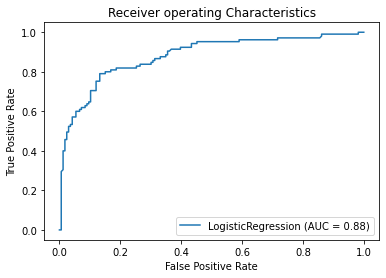

In [683]:
auc_roc(lg)

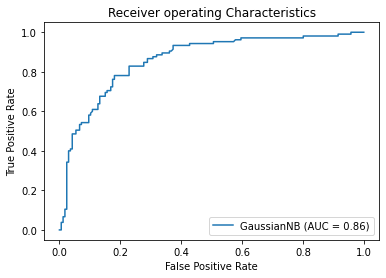

In [684]:
auc_roc(gnb)

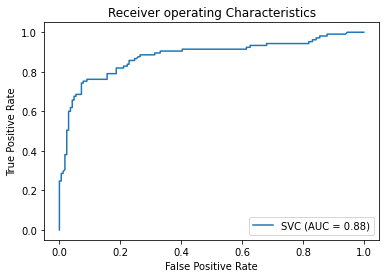

In [685]:
auc_roc(sv)

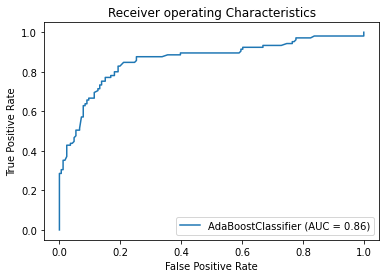

In [686]:
ad=ad.fit(x_train,y_train)

plot_roc_curve(ad,x_test,y_test)
plt.title('Receiver operating Characteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

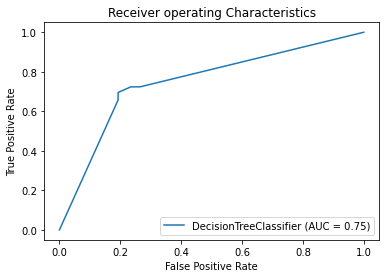

In [687]:
auc_roc(dtc)

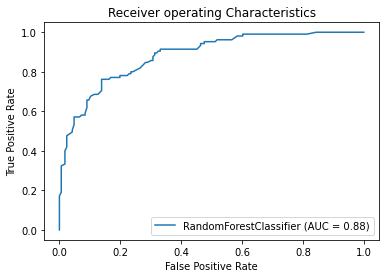

In [688]:
auc_roc(rf)

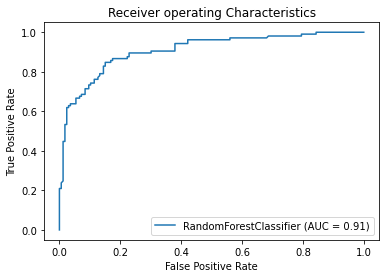

In [689]:
auc_roc(rfc)   #hypertuned

The area under curve is high for RandomForestClassifier(hypertuned paramter) with AUC score of 0.91. That means 91% of area under curve is covered in this model.

# RandomForestClassifier (hypertuned) Model is the final model with accuracy of 83.02%

# As seen above, random forest (rfc) (hypertuned) covers the maximum area. Therefore rfc is selected as the final model with true accuracy of 83.02%

# Conclusion

In [691]:
joblib.dump(rfc,"rfc_titanicsurvive_prediction.obj")

['rfc_titanicsurvive_prediction.obj']

In [692]:
#Lets Check loading the file 

titanic_prediction=joblib.load("rfc_titanicsurvive_prediction.obj")

In [693]:
titanic_prediction.score(x_test,y_test)

0.8302583025830258

In [695]:
pred=rfc.predict(x_test)
Conclusion=pd.DataFrame([titanic_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [696]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
Predicted,0,1,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
Original,0,1,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


we can see it is giving exact data as result. The model is working well

The datas predicted are perfectly matching. The jobfile created is working well almost giving  good accuracy.



After Training and Testing six algorithm model. The best accuracy model was determined as random forest classifier (hypertuned model) with 83% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.

Titanic survived or not survived can be easily predicted now through this model

# Model Created Succesfully